# Contextualización:


El dataset taxis (de la librería seaborn) incluye registros de viajes en taxis  en un período de tiempo específico, que cubren detalles esenciales como las fechas de recogida y entrega, número de pasajeros, distancia recorrida, tarifa, propinas, peajes, pago total, color del taxi y método de pago. Se incluyen estadísticas detalladas sobre la duración de los viajes, las distancias, las tarifas y los pagos.

Las variables del dataset son las siguientes:


- pickup: fecha y hora de recogida.
- dropoff: fecha y hora del término de viaje
- passengers: Número de pasajeros
- distance: Distancia recorrida (en millas).
- fare: Tarifa del viaje.
- tip: Propina extra.
- tolls: impuestos.
- total: Precio final del viaje, incluyendo tarifa, propina e impuestos.
- color: Color del taxi.
- payment: Medio de pago ( credit card, cash).
- pickup_borough: Zona de recogida (Manhattan, Bronx, Queens, Brooklyn)
- dropoff_borough: Zona de llegada

1. Carga la base de datos indicando que tipo de datos tiene cada variable, además del total de observaciones de cada una de ellas.

In [ ]:
# Ingresar las librerías de pyhton
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# ingresar la base taxis
base=sns.load_dataset('taxis')

In [ ]:
# Tipo de datos de cada variable
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [ ]:
base.isnull().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


2. Representar la variable total en un histograma, junto con el valor medio y la mediana de este.
 Luego determinar lo siguiente:

 (a) ¿La distribucion parece simetrica o sesgada? Hacia que valores se esta sesgando?

 (b) ¿La media y la mediana son similares? Que nos dice esto sobre la distribución?

**Definición: Mediana Muestral**

La mediana muestral de $n$ elementos se obtiene ordenando primero las $n$ observaciones de la más pequeña a la más grande, así
$$
\tilde{x}=\left\{\left(\dfrac{n+1}{2}\right),\quad n\,\mathrm{impar}\atop =\mathrm{promedio\, de\,} \left(\dfrac{n}{2}\right)\,y\,\left(\dfrac{n}{2}+1\right),\quad n\,\mathrm{par}\right.
$$

In [ ]:
# Calcular la media y la mediana de la variable total
media,mediana=base['total'].mean(),base['total'].median()

In [ ]:
print(f'Media : {round(media,2)}, mediana:{mediana}')

Media : 18.52, mediana:14.16


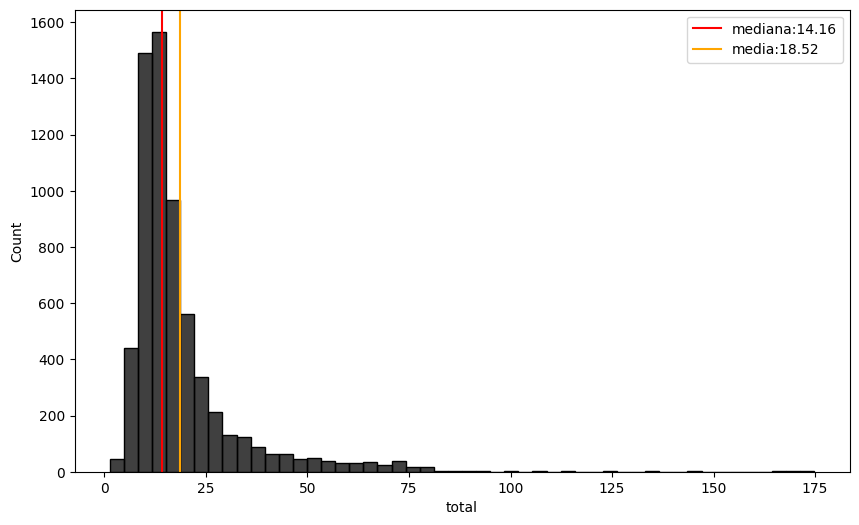

In [ ]:
# Graficar los datos en un histograma
fig=plt.figure(figsize=(10,6))
sns.histplot(base['total'],color='black',bins=50)
plt.axvline(mediana,color='red',label=f'mediana:{mediana}')
plt.axvline(media,color='orange',label=f'media:{round(media,2)}')
plt.legend()
plt.show()

In [ ]:
base['total'].skew()

np.float64(3.0933326288688754)

3. Crea un gráfico de barras que muestre la distancia recorrida promedio por zona de recogida

 (a) ¿Cuál es la zona de recogida, en donde se recorre una mayor distancia hasta llegar a destino?

 (b) ¿Hay alguna zona de recogida con una gran desviación?

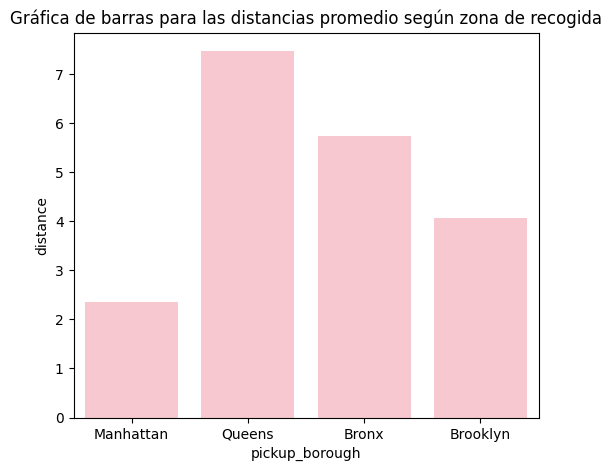

In [ ]:
fig=plt.figure(figsize=(6,5))
sns.barplot(y=base['distance'],x=base['pickup_borough'],estimator='mean',errorbar=None,color='pink')
plt.title('Gráfica de barras para las distancias promedio según zona de recogida')
plt.show()

In [ ]:
#Hay alguna zona de recogida con una gran desviación?

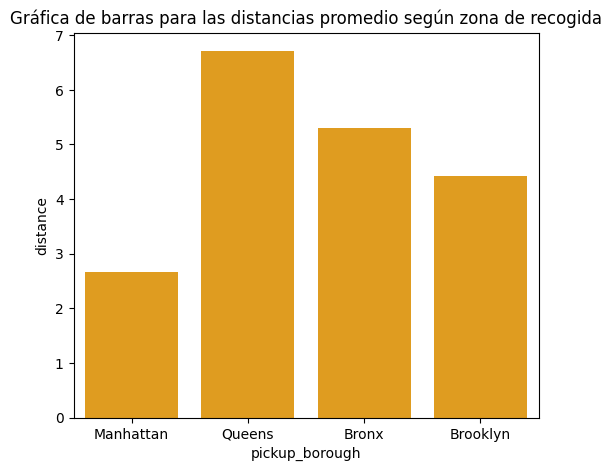

In [ ]:
fig=plt.figure(figsize=(6,5))
sns.barplot(y=base['distance'],x=base['pickup_borough'],estimator='std',errorbar=None,color='orange')
plt.title('Gráfica de barras para las desviaciones estándar promedio según zona de recogida')
plt.show()

4. Se desea visualizar la distribucion del precio total del viaje (variable total) mediante una grafíca de cajas comparativas (boxplot):

 (a) ¿Cuál es la mediana de la variable total en cada zona de recogida?

 (b)¿ Existen valores atípicos en cada categoría?

 (c)¿Qué zona de recogida tiene la mayor variabilidad en precios totales pagados?

In [ ]:
base['pickup_borough'].value_counts()

,count
pickup_borough,
Manhattan,5268
Queens,657
Brooklyn,383
Bronx,99


In [ ]:
# Mediana en cada zona de recogida
mediana_M=base[base['pickup_borough']=='Manhattan']['total'].median()
mediana_Q=base[base['pickup_borough']=='Queens']['total'].median()
mediana_By=base[base['pickup_borough']=='Brooklyn']['total'].median()
mediana_B=base[base['pickup_borough']=='Bronx']['total'].median()

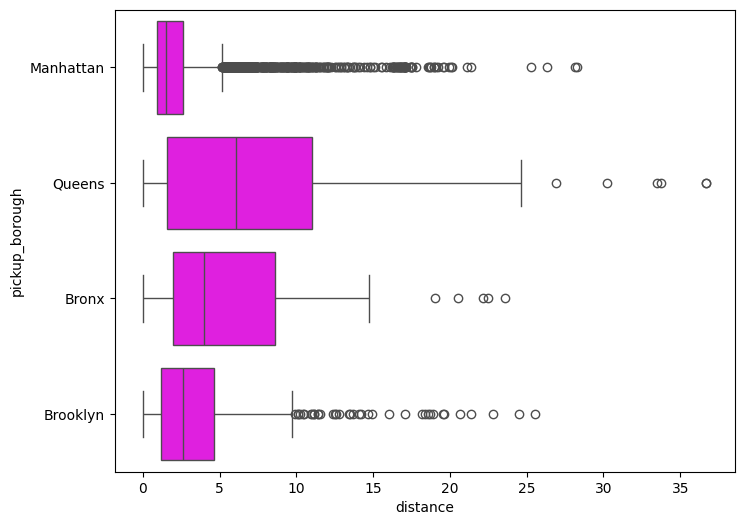

In [ ]:
fig=plt.figure(figsize=(8,6))
sns.boxplot(x=base['distance'],y=base['pickup_borough'],color='magenta')
plt.show()

5. Determinar la probabilidad de que un taxi lleve mas de 2 pasajeros y sea de color amarillo, dado que la zona de recogida es Queens

In [ ]:
# Calcularemos la probabilidad de que el punto de recogida sea en Queens
# P(Q)=casos favorables/casos totales
probabilidad_Q=round(((base['pickup_borough'].value_counts())/len(base)).iloc[1],3)


Calcularemos la probabilidad de la intersección de los 3 eventos
$$
P(P\cap A \cap Q)
$$

In [ ]:
# Probabilidad de que el auto lleve más de dos pasajeros y sea de color amarillo y cuyo punto de recogida sea queens
probabilidad_inter=len(base[(base['passengers']>2) &(base['color']=='yellow') & (base['pickup_borough']=='Queens')])/len(base)

$$
P(P\cap A | Q)=\frac{P(P\cap A \cap Q)}{P(Q)}
$$

In [ ]:
probabilidad_inter/probabilidad_Q

np.float64(0.08839226659107605)

## Cargar y limpiar la base de datos taxi_zone_lookup

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving taxi_zone_lookup.csv to taxi_zone_lookup.csv


In [ ]:
taxi=pd.read_csv('taxi_zone_lookup.csv')

In [ ]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [ ]:
taxi['Borough'].value_counts()
#Nos fijamos que hay datos Unknown que procederemos a quitar

,count
Borough,
Queens,69
Manhattan,69
Brooklyn,61
Bronx,43
Staten Island,20
Unknown,2
EWR,1


In [ ]:
taxi.drop(taxi[taxi['Borough']=='Unknown'].index).dropna()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
258,259,Bronx,Woodlawn/Wakefield,Boro Zone
259,260,Queens,Woodside,Boro Zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
